/tmp/ipykernel_71902/3468381199.py:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(color_map)


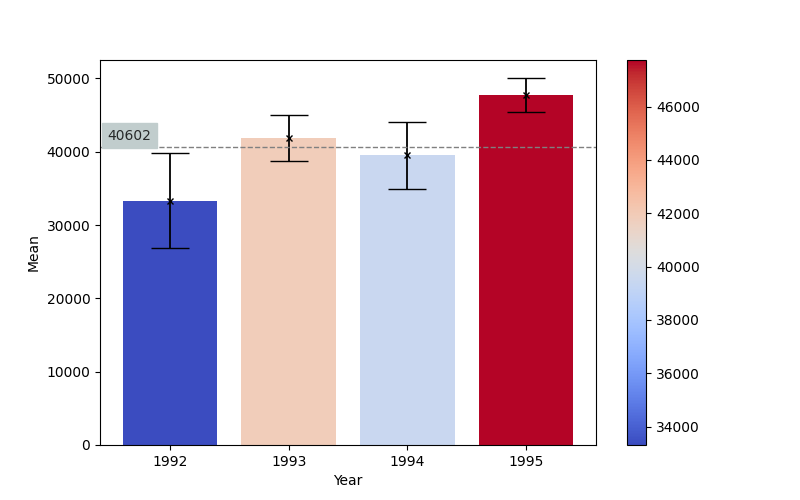

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import scipy.stats as stats
from pylab import *
import pandas as pd
import numpy as np
import matplotlib

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# get sample size, add column for mean, and std
sample_size = df.shape[1]
df['mean'] = df.mean(axis=1)
df['std'] = df.std(axis=1)

# to get 95% confidence level, we calculate its z-score
confidence_level = 0.95
z_critical = stats.norm.ppf((1+confidence_level)/2)

# find the confidence level and create a new df for the statistical values.
df['confidence_95'] = z_critical*df['std']/np.sqrt(sample_size)
df_stats=df[['mean','std','confidence_95']]

# fetch the coolwarm colormap
color_map = cm.ScalarMappable(cmap=cm.coolwarm)

# map the values to the colors in the array
color_map.set_array(df_stats['mean'])

# min, max, and average of the mean column
vmin = df_stats['mean'].min()
vmax = df_stats['mean'].max()
average = df_stats['mean'].mean()
average_norm = (average-vmin)/(vmax-vmin)

# normalize to ensure that the mean is at the center of the colormap i.e. white 
color_map.set_clim(vmin, vmax)
color_map.set_norm(plt.Normalize(vmin, vmax, average_norm))

# colorbar and convert the map to rgba
fig, ax = plt.subplots(figsize=(5*1.6,5))
plt.bar(df_stats.index, df_stats['mean'], color=color_map.to_rgba(df_stats['mean']))
cbar = plt.colorbar(color_map)

# error bars
ax.errorbar(df_stats.index, df_stats['mean'], yerr=df_stats['confidence_95'], color='black',
           fmt='x', capsize=14, markersize=5, linewidth=1.3)

# aesthetics
ax.set_xticks([1992,1993,1994,1995])
ax.set_xlabel('Year')
ax.set_ylabel('Mean')
ax.axhline(y=average, color='grey', linestyle= '--', lw=1);
ax.text(x=1991.47, y=average+1600, s=str(int(average)), va='center',backgroundcolor='#C1CDCD',alpha=0.8);
plt.savefig('statistics_confidence_95.pdf', bbox_inches='tight')